# action

# 1.数据加载

In [1]:
import numpy as np
import pandas as pd 
data = pd.read_csv('user_balance_table.csv',parse_dates = ['report_date'])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [2]:
total_balance = data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [3]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


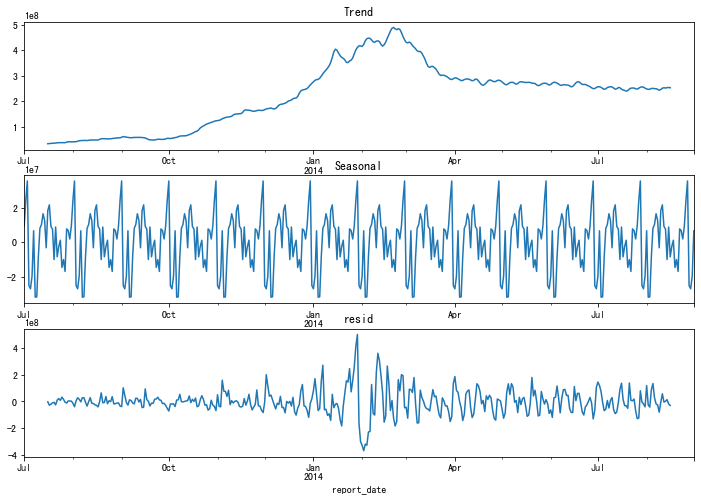

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
#指定区间范围内的数据，进行可视化’
def plot_stl(data):
    #trend,seasonal,residual
    result = sm.tsa.seasonal_decompose(data,freq= 30)
    #可视化
    fig = plt.figure(figsize = (12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    result.trend.plot(ax =ax1 , title = 'Trend')
    result.seasonal.plot(ax =ax2 , title = 'Seasonal')
    result.resid.plot(ax =ax3 , title = 'resid')
plot_stl(purchase.total_purchase_amt)

In [5]:
purchase['ds'] = purchase.index
purchase.rename(columns = {'total_purchase_amt':'y'},inplace = True)

In [6]:
redeem['ds'] = redeem.index
redeem.rename(columns = {'total_redeem_amt':'y'},inplace = True)

In [7]:
purchase = purchase.reset_index(drop = True)
redeem = redeem.reset_index(drop = True)

In [8]:
from fbprophet import Prophet
#拟合prophet
model = Prophet(seasonality_prior_scale = 0.1)
model.fit(purchase)
#预测未来1个月
future = model.make_future_dataframe(periods = 30)
purchase_pred = model.predict(future)
purchase_pred

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.390200e+07,-8.989365e+07,1.535935e+08,-1.390200e+07,-1.390200e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,3.100237e+07
1,2013-07-02,-1.275445e+07,-7.231227e+07,1.555877e+08,-1.275445e+07,-1.275445e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,0.0,0.0,0.0,3.483994e+07
2,2013-07-03,-1.160690e+07,-9.150101e+07,1.346815e+08,-1.160690e+07,-1.160690e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,0.0,0.0,0.0,2.606912e+07
3,2013-07-04,-1.045934e+07,-1.048134e+08,1.200226e+08,-1.045934e+07,-1.045934e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,0.0,0.0,0.0,9.024934e+06
4,2013-07-05,-9.311787e+06,-1.502368e+08,9.872170e+07,-9.311787e+06,-9.311787e+06,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,-2.719947e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.022295e+08,6.140929e+07,3.138664e+08,1.986965e+08,2.061086e+08,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,1.843418e+08
453,2014-09-27,2.014997e+08,2.085695e+07,2.426931e+08,1.976118e+08,2.056214e+08,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,0.0,0.0,0.0,1.320040e+08
454,2014-09-28,2.007699e+08,1.690857e+07,2.651924e+08,1.966322e+08,2.050927e+08,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,0.0,0.0,0.0,1.384943e+08
455,2014-09-29,2.000401e+08,1.177917e+08,3.637326e+08,1.955060e+08,2.046082e+08,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,2.449445e+08


In [9]:
from fbprophet import Prophet
#拟合prophet
model = Prophet(weekly_seasonality=True,seasonality_prior_scale = 0.1)
model.fit(purchase)
#预测未来1个月
future = model.make_future_dataframe(periods = 30)
purchase_pred = model.predict(future)
purchase_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.390200e+07,-8.225376e+07,1.516766e+08,-1.390200e+07,-1.390200e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,3.100237e+07
1,2013-07-02,-1.275445e+07,-8.817700e+07,1.490325e+08,-1.275445e+07,-1.275445e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,0.0,0.0,0.0,3.483994e+07
2,2013-07-03,-1.160690e+07,-9.053265e+07,1.437568e+08,-1.160690e+07,-1.160690e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,0.0,0.0,0.0,2.606912e+07
3,2013-07-04,-1.045934e+07,-1.038288e+08,1.256649e+08,-1.045934e+07,-1.045934e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,0.0,0.0,0.0,9.024934e+06
4,2013-07-05,-9.311787e+06,-1.537491e+08,9.512409e+07,-9.311787e+06,-9.311787e+06,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,-2.719947e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.022295e+08,6.874002e+07,2.991685e+08,1.984382e+08,2.063499e+08,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,1.843418e+08
453,2014-09-27,2.014997e+08,1.145283e+07,2.408409e+08,1.974131e+08,2.059579e+08,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,0.0,0.0,0.0,1.320040e+08
454,2014-09-28,2.007699e+08,2.106996e+07,2.526039e+08,1.965229e+08,2.054443e+08,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,0.0,0.0,0.0,1.384943e+08
455,2014-09-29,2.000401e+08,1.283465e+08,3.636102e+08,1.954419e+08,2.049789e+08,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,2.449445e+08


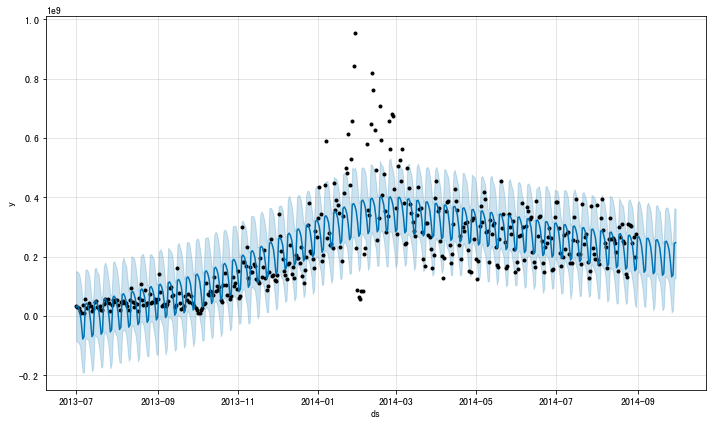

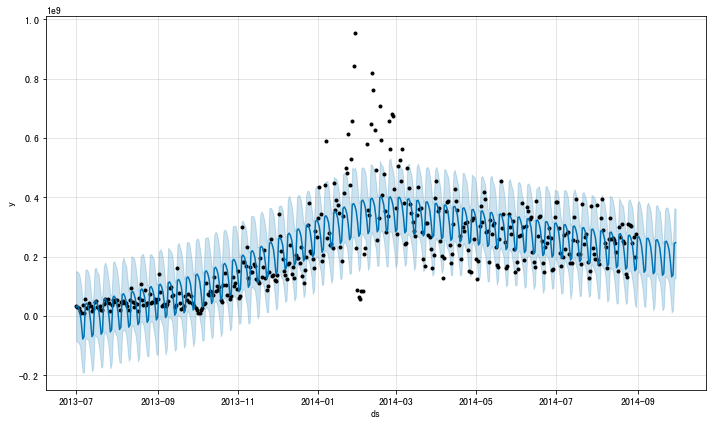

In [10]:
model.plot(purchase_pred)

In [16]:
#拟合prophet
model2 = Prophet(weekly_seasonality=True,seasonality_prior_scale = 0.1)
model2.fit(redeem)
#预测未来1个月
future = model2.make_future_dataframe(periods = 30)
redeem_pred = model2.predict(future)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-2.534752e+07,-6.856755e+07,1.083589e+08,-2.534752e+07,-2.534752e+07,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,0.0,0.0,0.0,2.366947e+07
1,2013-07-02,-2.446045e+07,-8.902801e+07,8.206209e+07,-2.446045e+07,-2.446045e+07,2.277699e+07,2.277699e+07,2.277699e+07,2.277699e+07,2.277699e+07,2.277699e+07,0.0,0.0,0.0,-1.683468e+06
2,2013-07-03,-2.357339e+07,-8.754715e+07,8.698606e+07,-2.357339e+07,-2.357339e+07,2.489704e+07,2.489704e+07,2.489704e+07,2.489704e+07,2.489704e+07,2.489704e+07,0.0,0.0,0.0,1.323649e+06
3,2013-07-04,-2.268633e+07,-1.005858e+08,6.556316e+07,-2.268633e+07,-2.268633e+07,6.125031e+06,6.125031e+06,6.125031e+06,6.125031e+06,6.125031e+06,6.125031e+06,0.0,0.0,0.0,-1.656130e+07
4,2013-07-05,-2.179927e+07,-1.091427e+08,5.952243e+07,-2.179927e+07,-2.179927e+07,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,0.0,0.0,0.0,-2.633309e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.930618e+08,2.045980e+08,3.768580e+08,2.916999e+08,2.943934e+08,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,-4.533825e+06,0.0,0.0,0.0,2.885280e+08
453,2014-09-27,2.932421e+08,1.478324e+08,3.232750e+08,2.917723e+08,2.946340e+08,-5.848294e+07,-5.848294e+07,-5.848294e+07,-5.848294e+07,-5.848294e+07,-5.848294e+07,0.0,0.0,0.0,2.347591e+08
454,2014-09-28,2.934223e+08,1.628884e+08,3.358674e+08,2.918522e+08,2.949056e+08,-3.979928e+07,-3.979928e+07,-3.979928e+07,-3.979928e+07,-3.979928e+07,-3.979928e+07,0.0,0.0,0.0,2.536231e+08
455,2014-09-29,2.936026e+08,2.575571e+08,4.265545e+08,2.919032e+08,2.951786e+08,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,4.901698e+07,0.0,0.0,0.0,3.426196e+08


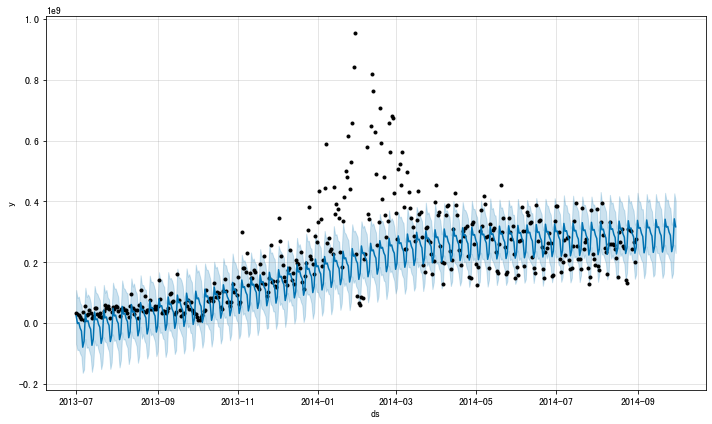

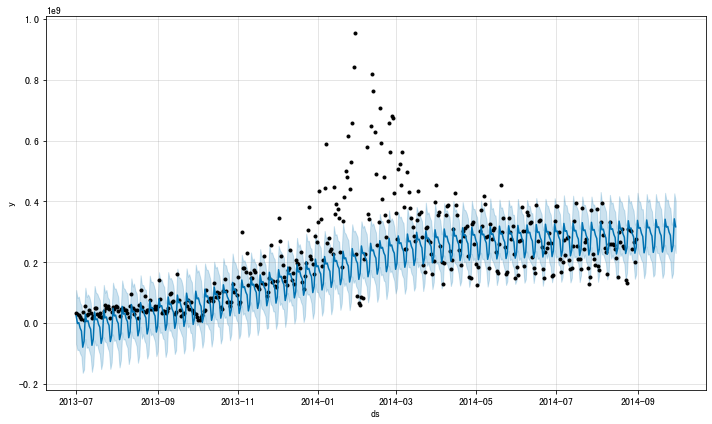

In [17]:
model.plot(redeem_pred)

In [18]:
purchase2= purchase_pred[(purchase_pred['ds'] >= '2014-09-01') &(purchase_pred['ds'] <= '2014-09-30')][['ds','yhat']]
purchase2

,ds,yhat
427,2014-09-01,2.653792e+08
428,2014-09-02,2.673394e+08
429,2014-09-03,2.566912e+08
430,2014-09-04,2.377697e+08
431,2014-09-05,1.996679e+08
432,2014-09-06,1.473300e+08
433,2014-09-07,1.538204e+08
434,2014-09-08,2.602705e+08
435,2014-09-09,2.622307e+08
436,2014-09-10,2.515825e+08


In [19]:
redeem2= redeem_pred[(redeem_pred['ds'] >= '2014-09-01') &(redeem_pred['ds'] <= '2014-09-30')][['ds','yhat']]
redeem2

,ds,yhat
427,2014-09-01,3.375726e+08
428,2014-09-02,3.115128e+08
429,2014-09-03,3.138131e+08
430,2014-09-04,2.952214e+08
431,2014-09-05,2.847428e+08
432,2014-09-06,2.309739e+08
433,2014-09-07,2.498378e+08
434,2014-09-08,3.388343e+08
435,2014-09-09,3.127746e+08
436,2014-09-10,3.150749e+08


In [20]:
#合并结果
result = pd.DataFrame()
result['ds'] = purchase2.ds
result['purchaes_amt'] = purchase2.yhat
result['redeem_amt'] = redeem2.yhat
result

,ds,purchaes_amt,redeem_amt
427,2014-09-01,2.653792e+08,3.375726e+08
428,2014-09-02,2.673394e+08,3.115128e+08
429,2014-09-03,2.566912e+08,3.138131e+08
430,2014-09-04,2.377697e+08,2.952214e+08
431,2014-09-05,1.996679e+08,2.847428e+08
432,2014-09-06,1.473300e+08,2.309739e+08
433,2014-09-07,1.538204e+08,2.498378e+08
434,2014-09-08,2.602705e+08,3.388343e+08
435,2014-09-09,2.622307e+08,3.127746e+08
436,2014-09-10,2.515825e+08,3.150749e+08


In [ ]:
result.to_csv('pro')